<a href="https://colab.research.google.com/github/nipun-taneja/label-noise-logreg-perceptron.ipynb/blob/main/label_noise_logreg_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Goal**
Quantify how label noise affects Logistic Regression vs Perceptron on a 2-class synthetic dataset, sweeping noise 0→50% and 0→100% with 10-fold CV, and visualize accuracy vs noise.
#**Methodology**
1. Synthetic Dataset Generation
2. Add random noise by flipping labels
3. Split Data
4. implement Cross Validation
5. Model Evaluation
6. Plot the accuracy of both models as a function of the noise levels.
7. Variate noise levels and analyse Further. Findings at end section.

In [52]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
import os


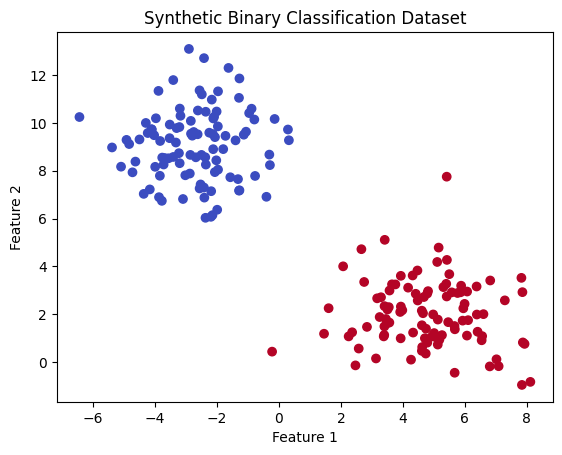

In [40]:

# Generating a synthetic dataset using make_blobs
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42, cluster_std=1.5)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Synthetic Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [41]:

def add_noise(y, noise_level):
    """Flip the labels of a percentage of the data."""

    n_samples = len(y)
    n_noisy = int(noise_level * n_samples)

    # Use np.random.choice to select the random indices of labels to flip
    noisy_indices = np.random.choice(n_samples, n_noisy, replace=False)

    y_noisy = y.copy()

    # Flip the labels
    y_noisy[noisy_indices] = 1 - y_noisy[noisy_indices]

    return y_noisy


Calling the add noise function to check if it works correctly. Visualising the original and noisy data set helps us envision how noise impacts in real world.


In [42]:
print("Original labels:", y)
noise_level = 0.1

# Call the add_noise function to add noise to the labels
y_noisy = add_noise(y, noise_level)
print("Noisy labels:", y_noisy)

Original labels: [1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0]
Noisy labels: [1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1
 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0]


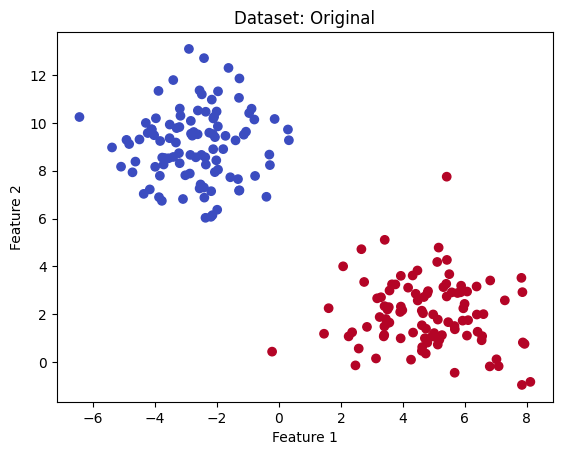

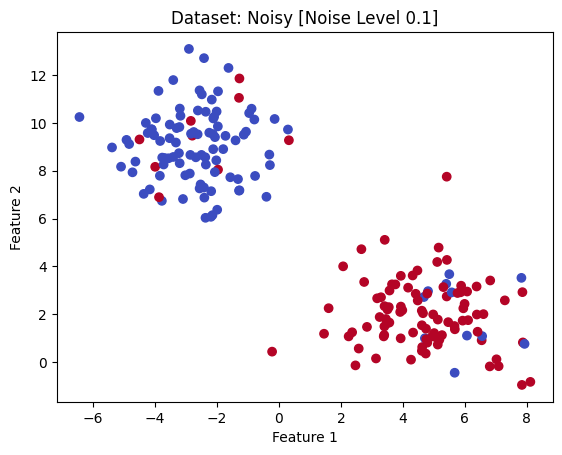

In [43]:
# Visualize the original dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Dataset: Original')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualize the noisy dataset
plt.scatter(X[:, 0], X[:, 1], c=y_noisy, cmap='coolwarm')
plt.title('Dataset: Noisy [Noise Level 0.1]')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

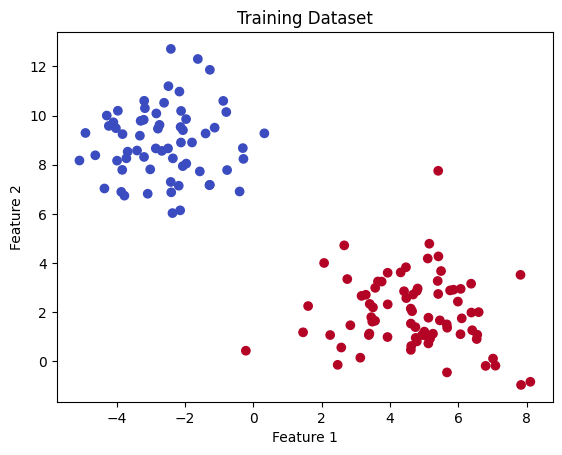

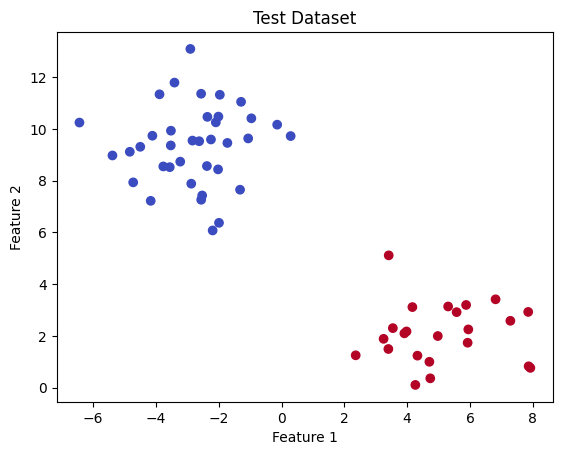

In [45]:

# Visualize the training dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('Training Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualize the test dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm')
plt.title('Test Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [46]:
def cross_val_model(model, X, y, folds=10):
    """Perform cross-validation and return average accuracy."""
    scores = cross_val_score(model, X, y, cv=folds, scoring='accuracy')
    return np.mean(scores)


Cross-validation is a statistical method used in machine learning to evaluate how well a model performs on an independent data set. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set and training the model on the remaining folds. This process is repeated multiple times each time using a different fold as the validation set. Finally the results from each validation step are averaged to produce a more robust estimate of the model’s performance.

The main purpose of cross validation is to prevent overfitting which occurs when a model is trained too well on the training data and performs poorly on new, unseen data. By evaluating the model on multiple validation sets, cross validation provides a more realistic estimate of the model’s generalization performance i.e. its ability to perform well on new, unseen data.

Here, it uses the cross_val_score function from scikit-learn to perform cross-validation. We have chosen that the data be divided into 10 folds.

With scikit libraries, we can simply call logistic regression and perceptron models on our train our data on these models with no extra code needed. The function "evaluate_with_noise_cv" can train and evaluate our data set, with any required noise level. The cross validation method is used for validation here as well.

In [47]:

# Function to train and evaluate models at different noise levels with cross-validation
def evaluate_with_noise_cv(noise_level):
    # Add noise to the training labels
    y_train_noisy = add_noise(y_train, noise_level)

    # Train Logistic Regression with cross-validation
    log_reg = LogisticRegression()
    log_reg_accuracy = cross_val_model(log_reg, X_train, y_train_noisy)

    # Train Perceptron with cross-validation
    perceptron = Perceptron()
    perceptron_accuracy = cross_val_model(perceptron, X_train, y_train_noisy)

    return log_reg_accuracy, perceptron_accuracy


The chosen levels below are from 0% noise to 50% noise at 2.5% noise interval.

In [48]:

# Step 5: Evaluate models across different noise levels and plot accuracy
noise_levels = np.arange(0.0, 0.5, 0.025)
accuracy_log_reg_list = []
accuracy_perceptron_list = []

for noise_level in noise_levels:
    acc_log_reg, acc_perceptron = evaluate_with_noise_cv(noise_level)
    accuracy_log_reg_list.append(acc_log_reg)
    accuracy_perceptron_list.append(acc_perceptron)

print("log reg accuracy",accuracy_log_reg_list)
print("perceptron accuracy",accuracy_perceptron_list)

log reg accuracy [np.float64(1.0), np.float64(0.9785714285714286), np.float64(0.95), np.float64(0.9214285714285715), np.float64(0.8928571428571429), np.float64(0.8785714285714287), np.float64(0.85), np.float64(0.8285714285714286), np.float64(0.7928571428571428), np.float64(0.7785714285714285), np.float64(0.75), np.float64(0.7214285714285713), np.float64(0.7), np.float64(0.6714285714285715), np.float64(0.65), np.float64(0.6214285714285716), np.float64(0.5714285714285714), np.float64(0.5642857142857143), np.float64(0.49285714285714277), np.float64(0.47857142857142854)]
perceptron accuracy [np.float64(0.9857142857142858), np.float64(0.9571428571428571), np.float64(0.9285714285714286), np.float64(0.8214285714285714), np.float64(0.8142857142857143), np.float64(0.85), np.float64(0.6428571428571429), np.float64(0.757142857142857), np.float64(0.6499999999999999), np.float64(0.5285714285714287), np.float64(0.5785714285714285), np.float64(0.6285714285714286), np.float64(0.6428571428571429), np.f

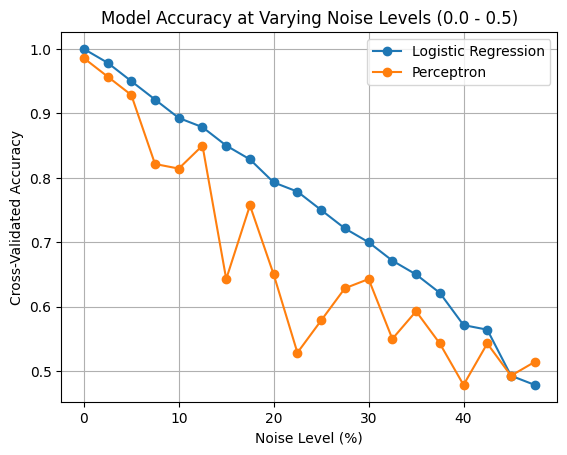

<Figure size 640x480 with 0 Axes>

In [49]:
# Plot the results for noise levels between 0.0 and 0.5
plt.plot([level * 100 for level in noise_levels], accuracy_log_reg_list, label='Logistic Regression', marker='o')
plt.plot([level * 100 for level in noise_levels], accuracy_perceptron_list, label='Perceptron', marker='o')

plt.title('Model Accuracy at Varying Noise Levels (0.0 - 0.5)')
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.grid(True)
plt.show()

os.makedirs("results", exist_ok=True)
plt.savefig("results/acc_vs_noise_0_50.png", dpi=200, bbox_inches="tight")

Upon plotting the accuracy of both perceptron and logistic regression models across different noise levels, I observed that logistic regression model is more robust than the perceptron model. Also, there appears to be very gradual decline in accuracy of a logistic regression model whereas its more volatile decline for perceptron. Logistic Regression, being a more sophisticated model that estimates probabilities, appears better at handling label noise than the simpler linear classifier, Perceptron. This is likely because Logistic Regression can learn a probabilistic relationship between the features and the noisy labels, whereas the Perceptron tries to find a hard linear boundary that is easily disrupted by flipped labels.

In [50]:
# Step 5: Evaluate models across different noise levels and plot accuracy
noise_levels = np.arange(0.0, 1.0, 0.025)
accuracy_log_reg_list = []
accuracy_perceptron_list = []

for noise_level in noise_levels:
    acc_log_reg, acc_perceptron = evaluate_with_noise_cv(noise_level)
    accuracy_log_reg_list.append(acc_log_reg)
    accuracy_perceptron_list.append(acc_perceptron)

print("log reg accuracy",accuracy_log_reg_list)
print("perceptron accuracy",accuracy_perceptron_list)

log reg accuracy [np.float64(1.0), np.float64(0.9785714285714286), np.float64(0.95), np.float64(0.9285714285714286), np.float64(0.8928571428571429), np.float64(0.8785714285714287), np.float64(0.85), np.float64(0.8214285714285714), np.float64(0.8071428571428572), np.float64(0.7785714285714286), np.float64(0.7428571428571429), np.float64(0.7285714285714286), np.float64(0.6928571428571428), np.float64(0.6785714285714286), np.float64(0.6500000000000001), np.float64(0.6214285714285714), np.float64(0.5428571428571428), np.float64(0.5285714285714286), np.float64(0.5428571428571428), np.float64(0.5214285714285714), np.float64(0.49285714285714277), np.float64(0.5428571428571429), np.float64(0.5357142857142858), np.float64(0.5285714285714286), np.float64(0.6), np.float64(0.6142857142857142), np.float64(0.6571428571428573), np.float64(0.6714285714285714), np.float64(0.6785714285714286), np.float64(0.7214285714285714), np.float64(0.75), np.float64(0.7714285714285715), np.float64(0.8), np.float64(0

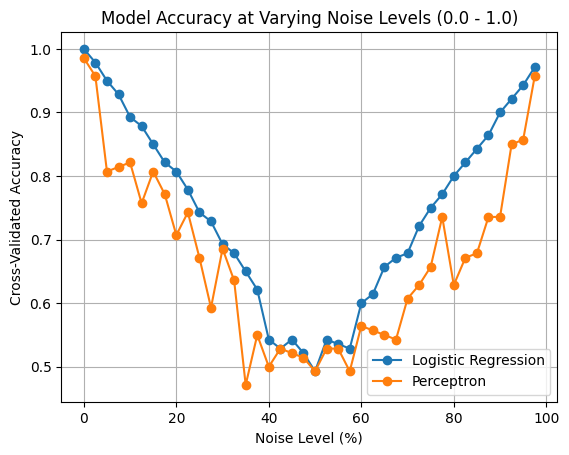

<Figure size 640x480 with 0 Axes>

In [51]:
# Plot the results for noise levels between 0.0 and 0.5
plt.plot([level * 100 for level in noise_levels], accuracy_log_reg_list, label='Logistic Regression', marker='o')
plt.plot([level * 100 for level in noise_levels], accuracy_perceptron_list, label='Perceptron', marker='o')
os.makedirs("results", exist_ok=True)
plt.savefig("results/acc_vs_noise_0_50.png", dpi=200, bbox_inches="tight")
plt.savefig("results/acc_vs_noise_0_100.png", dpi=200, bbox_inches="tight")
plt.title('Model Accuracy at Varying Noise Levels (0.0 - 1.0)')
plt.xlabel('Noise Level (%)')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("results/acc_vs_noise_0_100.png", dpi=200, bbox_inches="tight")

Very Interesting behaviour. This showcases that perhaps the both the models when trained on more than 50% noisy data, start fitting the noise itself. And there accuracy has started increasing beyond 50%. These models trained on noisy data might have learned to fit the noise itself, leading to poor generalization on unseen data. In real applicaton, this can be very misleading, because the model will be less able to predict accurately on new, unseen data because it has learned to rely on the noise rather than the underlying patterns.

#Key findings


1.   Plots show that LR degrades smoothly; Perceptron drops faster and is more volatile—LR is more robust to noisy labels. (Your observation, kept.)
2.   Mechanism: LR’s probabilistic loss tolerates mislabeled points better than a hard-boundary Perceptron. (Your point, tightened.)
3.   Around ~50% noise, accuracy should approach ~0.5 (random). If the 0–100% plot shows an uptick beyond 50%, that’s likely variance / evaluating against the same noisy labels in CV—do not claim real generalization. On a clean test set, accuracy would not increase past 50%.
4.   Practical: prefer logistic (probabilistic) training under noisy supervision; add data cleaning/robust loss if noise is high.







